PREDICTION OF CUSTOMER CHURN and FEATURES SELECTION

## Table of Contents

#### Introduction: Loading of Libraries and Data Set

#### Part 1: Exploratory Data Analysis (EDA)
   
#### Part 2:  Building Machine Learning Model
##### 1. ML Model - Support Vector Machine 
##### 2. ML Model - Decision Tree
##### 3. ML Model - Logistic Regression

#### Part 3: ML Model Comparison
 
#### Appendix: Data Dictionary

The following jupyter notebook includes the detailed Machine Learning analysis accompanying the report submitted for the analysis of customer churn in the telecommunications sector. The analysis is structured in the following: after the initial Exploratory Data Analysis and data cleaning, a new dataframe with the pre-processed data is created. This dataframe will then be split into training and testing dataset to be able to apply the above mentionned Machine Learning Models. <br>

After initial run of the respective Machine Learning model with default parameters the results are evaluated and based on the evaluation different methods of tuning of parameters are applied. <br>

Objective of the analysis is to evaluate the performance of the implemented Machine Learning models respective to our problem statement to analyse which features have the highest influence on customer churn desisons.

## Part 1: Exploratory Data Analysis - EDA

Exploratory Data Analysis is used to analyse datasets and outline the main characteristics of the data. It helps in understanding the patterns within the data, identify evident errors and find correlation between features. Conducting EDA is one of the first steps we do with any dataset we work with in order to explore the data as it enables us to acknowledge what kind of data we are dealing with by checking the shape and size of the data, identifying missing values, unique values and others.

In order to conduct EDA first step needed is to import the required libraries:

Pandas is used to clean the data, manipulate into tables and process it. It handles data load by reading from various sources;
Seaborn library is used for data visualisation;
Matplot is also used for data visualisation;
%matplotlib inline is used to format the visualisations;
Numpy is used for mathematical operations.

By importing the libraries with a short name allows us to save typing the full name of the library every time we need to call it in a function.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots, show
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import scale

Suppress the warning messages

In [2]:
import warnings
warnings.filterwarnings('ignore') 

By running the code below the data from the dataset is uploaded into the dataframe using Pandas Library. A dataframe object is created transferring semi structured data (in this case a csv file) into a structured type of data.

pd.read_csv works for any data file that is a csv type using Pandas library by giving an address where the data is.

In [3]:
df = pd.read_csv('Telco_cust_Churn.csv')

To check how many columns and observations are in this dataset we can use .shape function. The first number shows the number of rows or observations and the second one shows the total number of columns within the dataset. This dataset as we can see has 7,043 observations and 21 columns.

In [4]:
df.shape

(7043, 21)

Now to read the data we need to call the dataframe created "df" and the function .head to see what is available within this dataset. Changing the argument in between brackets allows us to add the number of rows we want to see. If we do not add a number between brackets by default the function will show the top 5 rows within the dataset (all indexes start with zero).

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,'No phone service',DSL,No,...,No,No,No,No,Month-to-month,Yes,'Electronic check',29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,'One year',No,'Mailed check',56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,'Mailed check',53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,'No phone service',DSL,Yes,...,Yes,Yes,No,No,'One year',No,'Bank transfer (automatic)',42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,'Fiber optic',No,...,No,No,No,No,Month-to-month,Yes,'Electronic check',70.70,151.65,Yes


In order to display the bottom 5 rows of the dataset the function .tail is used. Like function .head by default .tail shows 5 entries in the dataset. It also can be changed by modifying the argument number between brackets.

In [6]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,'One year',Yes,'Mailed check',84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,'Fiber optic',No,...,Yes,No,Yes,Yes,'One year',Yes,'Credit card (automatic)',103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,'No phone service',DSL,Yes,...,No,No,No,No,Month-to-month,Yes,'Electronic check',29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,'Fiber optic',No,...,No,No,No,No,Month-to-month,Yes,'Mailed check',74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,'Fiber optic',Yes,...,Yes,Yes,Yes,Yes,'Two year',Yes,'Bank transfer (automatic)',105.65,6844.5,No


### Dropping Columns

As seen above this dataset contains 21 features, however not all of them are relevant to this project as not all of them affect the customer churn. Analysing the dataset we can see variable such as "customerID" have no effect on customer leaving, therefore this column will be removed below by using the .drop function.

In [7]:
df.drop("customerID",axis=1,inplace=True)   

By running the function .dtypes we can see all the variables and confirm the column "customerID" has been dropped.

In [8]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Dropping Missing Values

The .info is another function to check the data. The first column is the index for each feature we have, the second column shows the variables and the third column gives the data type, if it is an object means the data is text, float64 is a decimal number and int64 when it is whole number.

It is useful information in order to start preparing the data. According to the below, this dataset has 3 features that are text (object) therefore qualitative data; 9 features that contain whole numbers (int64) and 2 features with decimal numbers (float64) which means both quantitative data. Also shows there are no null values and gives how much memory is being used in the computer.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Printing the code above we could see that "TotalCharges" is an object however it should be a number. Therefore we need to convert it by using the code .to_numeric.

In [10]:
# pd.to_numeric(df.TotalCharges)

# by running this code we have got error which has informed us as follows:
# Unable to parse string "' '" at position 488
# therefore, we decided to perform the next steps to remove the values " " in our dataset and then use another method to convert to a numeric variable.

In order to correct the error above we will replace the ' ' with null values (np.nan)

In [11]:
df['TotalCharges'] = df['TotalCharges'].replace("' '", np.nan)

After performing that step we should be able now to convert this column to Float type with the function .astype().

In [12]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

Running .dtype we can confirm the variable type has been corrected.

In [13]:
df.TotalCharges.dtypes

dtype('float64')

### Identifying Duplicates and Missing Values

Identifying duplicates and missing data are important steps of data preparation to clean the data and reduce bias. Additionally, in order to apply Machine Learning models the dataset should no longer contain any missing values.

### Duplicates

As we can see, running the .duplicate function below the first number shows the number of duplicates equals 22 rows and the second column shows the total number of columns equals 20.

In [14]:
df_dup = df[df.duplicated()]
print("Number of duplicate rows: ", df_dup.shape)

Number of duplicate rows:  (22, 20)


As the number of duplicates is very small compared to the total rows within the dataset, dropping them should not affect the final result of this project. Therefore using code .drop_duplicates below to drop the 22 duplicated rows from the dataset.

In [15]:
df = df.drop_duplicates()

In order to confirm the duplicates were dropped we run the function below again to check the total duplicates which now shows zero.

In [16]:
df_dup1 = df[df.duplicated()]
print("Number of duplicate rows: ", df_dup1.shape)

Number of duplicate rows:  (0, 20)


### Missing Values

One of the most important goals of EDA is to identify missing values within the dataset.<br>
We can check this using function .isnull(). <br>
As we see we have some missing values in our dataset.

In [17]:
df.isnull().values.any()

True

We can also check the missing values for all the dataset by using .sum, it shows the variable name in the first column followed by the total number of missing values in the second column. That way we can see what is the column that contains missing values. And as expected, we have missing values for the 'TotalCharges' variable as we have been replacing value " " with np.nan above.

In [18]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We have 11 observations with missing values and due to low volume with comparison to total number of observations in our dataset we are deciding to remove these observations using function .dropna

In [19]:
df = df.dropna(how='any', axis = 0)

Now we can check and confirm if there are still any missing values.

In [20]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [21]:
df.shape

(7010, 20)

We have completed the data cleaning process with regards to duplicates and missing data and can move to next steps in the EDA.

## Renaming Columns

In order to keep the variable names in the same style, column "tenure" has been renamed by using function .rename as follows.

In [22]:
 df = df.rename(columns={"tenure":"Tenure"})

By running .head again we can confirm below the column has been renamed.

In [23]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,'No phone service',DSL,No,Yes,No,No,No,No,Month-to-month,Yes,'Electronic check',29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,'One year',No,'Mailed check',56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,'Mailed check',53.85,108.15,Yes
3,Male,0,No,No,45,No,'No phone service',DSL,Yes,No,Yes,Yes,No,No,'One year',No,'Bank transfer (automatic)',42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,'Fiber optic',No,No,No,No,No,No,Month-to-month,Yes,'Electronic check',70.70,151.65,Yes


## Visualisation of Key Features

Next, we will visualise some of our variables to get a better idea about the distribution of data and observations.

### Variable "Tenure"

The "Tenure" feature demonstrates how loyal the customer is as it refers to the number of months that the customer has been a client. Therefore, by using a histogram we can see how many of the loyal customers are leaving.

Below we create two new dataframes: "tenure_churn_no" for customers who did not leave the company and "tenure_churn_yes" for customers who left the company. Then we plot an histogram using Matplot Library. The function .hist allows us to see the tenure for customers who left and customers who did not leave the company. We added a label to allow us to visualise which are the columns and the function .legend allows us to add a legend to the histogram.

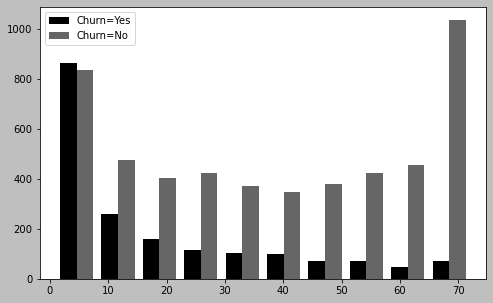

In [24]:
plt.style.use('grayscale')
plt.rcParams['figure.figsize'] = (8, 5)
tenure_churn_no = df[df.Churn=="No"].Tenure
tenure_churn_yes = df[df.Churn=="Yes"].Tenure

plt.hist([tenure_churn_yes,tenure_churn_no],label=["Churn=Yes","Churn=No"])
plt.xlabel=("Tenure")
plt.ylabel=("Number of Customers")
plt.title=("Customer Churn Prediction")
plt.legend()
plt.show()

Analysing the histogram above we can see long-time clients are more loyal and less likely to leave as people that have been with the company for 70 months the majority of the customers did not leave. Around 1,000 customers did not leave while around less than 100 left. On the other hand, people that are customers for less than 10 months are more likely to leave.

### Variable "Monthly Charges"

Another reason that could lead customers to leave are the monthly charges. Below is the histogram in which we can see the number of customers who leave based on the monthly charges.

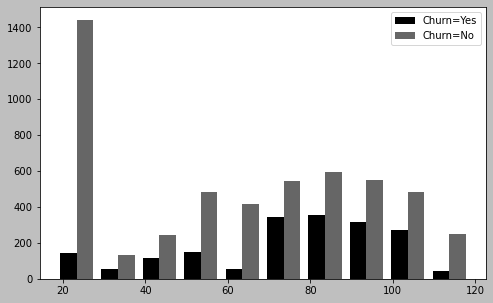

In [25]:
plt.style.use('grayscale')
plt.rcParams['figure.figsize'] = (8, 5)

tenure_churn_no = df[df.Churn=="No"].MonthlyCharges
tenure_churn_yes = df[df.Churn=="Yes"].MonthlyCharges

plt.hist([tenure_churn_yes,tenure_churn_no],label=["Churn=Yes","Churn=No"])
plt.xlabel=("Monthly Charges")
plt.ylabel=("Number of Customers")
plt.title=("Customer Churn Prediction")
plt.legend()
plt.show()

On the above histogram we can see that the lower the charges the more customers stay. Where charge is 20 the number of customers who do not leave is very high around 1,400 customers while the customers who leave is lower around less than 200.

### Visualise "Churn" and "Gender"

We would like to check relation between the Churn and gender.

Text(0.5, 1.0, 'Churn vs Gender')

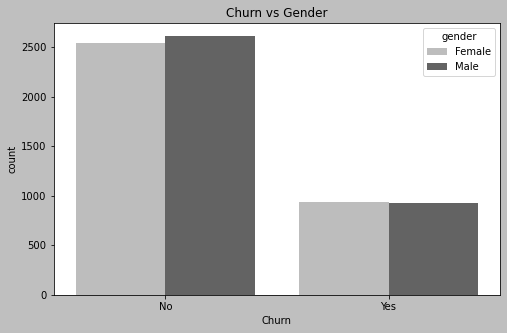

In [26]:
colors = ["#bdbdbd", "#636363"]
sns.set_palette(sns.color_palette(colors))
ax = sns.countplot(x='Churn',data=df,hue='gender')
ax.set_title('Churn vs Gender')

From the above graph, we can see that gender is not a contributing factor for customer churn in this data set as the numbers of both the genders, that have or haven’t churned, are almost the same.

### "Churn" and  "Internet Service Coverage"

Also, we are going to see the relation between Churn and Internet Service coverage.

Text(0.5, 1.0, 'Churn vs Internet Service coverage')

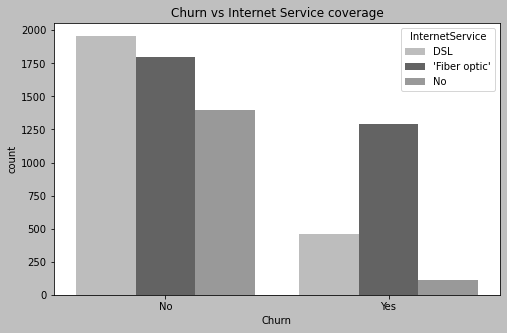

In [27]:
colors = ["#bdbdbd", "#636363", '#999999']
sns.set_palette(sns.color_palette(colors))
ax = sns.countplot(x='Churn',data=df, hue='InternetService')
ax.set_title('Churn vs Internet Service coverage')

We can see that people using Fiber-optic services have a higher churn percentage. This shows that the company might need to look into improving their Fiber-optic service.

### Finding Unique Values

In [28]:
def print_unique_column_values(df):
    for column in df:
        if df[column].dtypes=="object":
            print(f"{column} : {df[column].unique()}")

The function above was created in order to demonstrate only the object type of column. Below we call the function above and the unique values for all the categorical columns.

In [29]:
print_unique_column_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ["'No phone service'" 'No' 'Yes']
InternetService : ['DSL' "'Fiber optic'" 'No']
OnlineSecurity : ['No' 'Yes' "'No internet service'"]
OnlineBackup : ['Yes' 'No' "'No internet service'"]
DeviceProtection : ['No' 'Yes' "'No internet service'"]
TechSupport : ['No' 'Yes' "'No internet service'"]
StreamingTV : ['No' 'Yes' "'No internet service'"]
StreamingMovies : ['No' 'Yes' "'No internet service'"]
Contract : ['Month-to-month' "'One year'" "'Two year'"]
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ["'Electronic check'" "'Mailed check'" "'Bank transfer (automatic)'"
 "'Credit card (automatic)'"]
Churn : ['No' 'Yes']


We can see above, the observations for a few variables are 'No internet service' or 'No phone service' which are the same as "No". Therefore, we can fix it by using the .replace function from Pandas Library.

In [30]:
df.replace("'No internet service'","No",inplace=True)
df.replace("'No phone service'","No",inplace=True)

Running unique values again we can check there are no 'No internet service' or 'No phone service' anymore.

In [31]:
print_unique_column_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' "'Fiber optic'" 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' "'One year'" "'Two year'"]
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ["'Electronic check'" "'Mailed check'" "'Bank transfer (automatic)'"
 "'Credit card (automatic)'"]
Churn : ['No' 'Yes']


### Converting Categorical Variables into Numerical Variables

We can also note above that this dataset has numerous columns with "yes" or "no" observations. However machine learning algorithms work better with numerical data. Therefore by using a new dataframe created "yes_no_columns" we call the function .replace below and using the function .drop we isolate both variables in order to work on converting both columns to numerical values.

In [32]:
yes_no_columns = {"Partner",
                  "Dependents",
                  "PhoneService",
                  "MultipleLines",
                  "OnlineSecurity",
                  "OnlineBackup",
                  "DeviceProtection",
                  "TechSupport",                  
                  "StreamingTV",
                  "StreamingMovies",
                  "PaperlessBilling",
                  "Churn"}

for col in yes_no_columns:
    df[col].replace({"Yes":1,"No":0},inplace=True)

Now printing the unique values again we can see the "yes" or "no" was replaced with "1" and "0" values, respectively.

In [33]:
for col in df:
    print(f"{col} : {df[col].unique()}")

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
Tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' "'Fiber optic'" 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' "'One year'" "'Two year'"]
PaperlessBilling : [1 0]
PaymentMethod : ["'Electronic check'" "'Mailed check'" "'Bank transfer (automatic)'"
 "'Credit card (automatic)'"]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


Using the .replace function we can also replace "Female" or "Male" with "1" and "0" values on column "gender", respectively.

In [34]:
df["gender"].replace({"Female":1,"Male":0},inplace=True)

Now the .unique code below confirms the variable observations have changed to numerical data.

In [35]:
df["gender"].unique()

array([1, 0], dtype=int64)

We still have some data cleaning to be done as columns "InternetService", "Contract" and "PaymentMethod" still have categorical data. However, since there are more than two categories for each of them we will use hot encoding and create a new dataframe "dp_new" in order to create columns with those categories. Therefore, column "InternetService" for example, three new columns are created using the .get_dummies function from Pandas Library: 'InternetService_'Fiber optic', 'InternetService_DSL'and 'InternetService_No'. We can see all of the new columns created with the three variables by printing the .columns function.

In [36]:
df_new = pd.get_dummies(data=df,columns=["InternetService","Contract","PaymentMethod"])
df_new.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_'Fiber optic'', 'InternetService_DSL',
       'InternetService_No', 'Contract_'One year'', 'Contract_'Two year'',
       'Contract_Month-to-month', 'PaymentMethod_'Bank transfer (automatic)'',
       'PaymentMethod_'Credit card (automatic)'',
       'PaymentMethod_'Electronic check'', 'PaymentMethod_'Mailed check''],
      dtype='object')

Also, per .sample function below we can see in total 10 columns were created as now the number of columns has increased to 27 columns. Originally we had 21 columns, then previously we removed one irrelevant column, now we removed 3 columns and added 10 new columns instead.

In [37]:
df_new.sample(4)

,gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_'Fiber optic',InternetService_DSL,InternetService_No,Contract_'One year',Contract_'Two year',Contract_Month-to-month,PaymentMethod_'Bank transfer (automatic)',PaymentMethod_'Credit card (automatic)',PaymentMethod_'Electronic check',PaymentMethod_'Mailed check'
4877,1,0,0,0,30,1,0,1,1,1,...,0,1,0,1,0,0,0,1,0,0
3363,0,0,1,0,57,0,0,0,1,1,...,0,1,0,0,1,0,1,0,0,0
2012,1,0,1,0,47,1,1,1,1,1,...,1,0,0,0,0,1,0,0,1,0
3097,0,0,0,1,2,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


Printing .dtypes function once more, we can confirm all variables are numbers and there is no text anymore. Also, the extra 10 columns created appear as uint8 type.

In [38]:
df_new.dtypes

gender                                         int64
SeniorCitizen                                  int64
Partner                                        int64
Dependents                                     int64
Tenure                                         int64
PhoneService                                   int64
MultipleLines                                  int64
OnlineSecurity                                 int64
OnlineBackup                                   int64
DeviceProtection                               int64
TechSupport                                    int64
StreamingTV                                    int64
StreamingMovies                                int64
PaperlessBilling                               int64
MonthlyCharges                               float64
TotalCharges                                 float64
Churn                                          int64
InternetService_'Fiber optic'                  uint8
InternetService_DSL                           

We need to rename the features names where some wording is in '', to not cause issues after.

In [39]:
df_new = df_new.rename(columns={"InternetService_'Fiber optic'":"InternetService_Fiber optic", 
                        "Contract_'One year'": "Contract_One year ",
                       "Contract_'Two year'" : "Contract_Two year",
                       "PaymentMethod_'Bank transfer (automatic)'": "PaymentMethod_Bank transfer (automatic)",
                       "PaymentMethod_'Credit card (automatic)'":"PaymentMethod_Credit card (automatic)",
                       "PaymentMethod_'Electronic check'":"PaymentMethod_Electronic check",
                       "PaymentMethod_'Mailed check'":"PaymentMethod_Mailed check"})

In [40]:
df_new.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
Tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_Fiber optic                  uint8
InternetService_DSL                          uint8
InternetService_No             

### Data Scaling

Another important step of data preparation is Data Scaling. Looking at the data most of the variables are in ranges 1 and 0 while variables "Tenure", "MontlyCharges" and "TotalCharges" have different ranges. Therefore it is necessary to scale those columns.In order to do that it is require to import MinMaxScaler from Sklearn Library and call .fit_transform function for columns to scale and fit it within the "df_new" dataframe.

In [41]:
cols_to_scale = ["Tenure","MonthlyCharges","TotalCharges"]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_new[cols_to_scale] = scaler.fit_transform(df_new[cols_to_scale])

Now to check the changes above we print .sample function again and we can note the "Tenure" scale has changed.

In [42]:
df_new.sample(3)

,gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_DSL,InternetService_No,Contract_One year,Contract_Two year,Contract_Month-to-month,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5979,0,0,0,0,0.732394,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
3395,0,0,0,0,0.859155,1,1,1,1,1,...,1,0,0,0,0,1,1,0,0,0
1812,0,0,1,0,0.225352,1,0,0,0,1,...,1,0,0,1,0,0,1,0,0,0


Another way of checking the other two columns "MontlyCharges" and "TotalCharges" have been scaled as we cannot visualise above is by printing the .unique function again. Now we can confirm below the three variables have been scaled.

In [43]:
for col in df_new:
    print(f"{col} : {df_new[col].unique()}")

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
Tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

## Visualise Target Variable "Churn"

Using below bar chart we would like to visualise our Target column "Churn" and see how many customers are Churn or Stay with the company.

Text(0.5, 1.0, 'Number customers who churn vs stay')

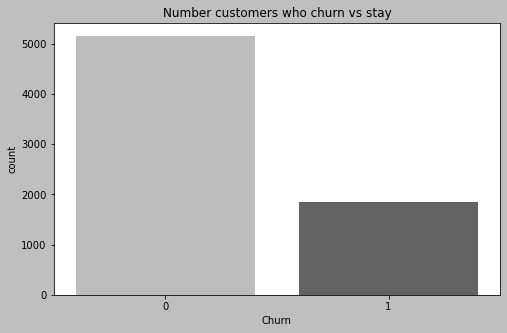

In [44]:
colors = ["#bdbdbd", "#636363"]
sns.set_palette(sns.color_palette(colors))
ax = sns.countplot(df_new['Churn'])
ax.set_title('Number customers who churn vs stay')

Based on this graph, we can see the data is highly imbalanced with more customers staying compared with churning, represented by 0 and 1, respectively. There are methods to balance the data prior to machine learning, such as upsampling and downsampling. However, the methods are not in scope for this project.

# PART 2: Building Machine Learning Model

The machine learning techniques to be used is dependent on a number of things, such as trying to solve for the problem statement and the size and form of the data set. It also depends on the size, quality and nature of the data in general. If the data is labelled a supervised training method can be implemented. If the data is unlabelled, unsupervised models may be implemented. For our analyses we will focus on supervised learning techniques, helping us predict the customer churn of the telecom data set.

After implementation of our models we will have to check for the following: <br>
Overfitting: Good performance on the training data, poor generliazation to other data. <br>
Underfitting: Poor performance on the training data and poor generalization to other data

## For Machine Learning model we are splitting the data into two datasets, as follows:<br>
X = independent features <br>
y = label

For the dataset X we are dropping the variable “Churn", and for dataset y, we will only include the label data “Churn”.

In [45]:
X = df_new.drop('Churn', axis =1)
y = df_new[['Churn']]

Confirming the split by checking the shape for both new datasets:

In [46]:
y.head(2)
y.shape

(7010, 1)

In [47]:
X.head(2)
X.shape

(7010, 26)

X includes 7010 rows and 26 variables <br>
y includes 7010 rows and only 1 column “churn”.

We are importing the required sklearn Machine Learning module to split our dataset into training and testing dataset.

In [48]:
from sklearn.model_selection import train_test_split


Train test split of data: we decided on applying the "rule of thumb" and splitting into a test size of 30% and 70% for training respectively.

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#### Display number of rows and columns (dimensions) of the unsplit dataset:

In [50]:
print('Total number of rows and columns for the complete dataset: ', X.shape, y.shape)

Total number of rows and columns for the complete dataset:  (7010, 26) (7010, 1)


#### Display the rows and columns (dimensions) of the split dataset:


In [51]:
print('Number of rows and columns after splitting dataset: ', X_train.shape, X_test.shape, y_train.shape, y_test.shape )

Number of rows and columns after splitting dataset:  (4907, 26) (2103, 26) (4907, 1) (2103, 1)


# 1. ML MODEL - SUPPORT VECTOR MACHINE

# Model Building - Support Vector Machine (SVM)

<b>Support Vector Machine (SVM) </b> is one of the most useful supervised ML algorithms. It can be used for both classification and regression tasks. <br>
SVM chooses the hyperplane that does maximum separation between classes.<br>
We are going to use the following Hyperparameters:<br>
- Hyper-parameter C - The number of misclassifications errors can be controlled using the C parameter, which has a direct effect on the hyperplane.<br>
- Hyper-parameter Gamma - Gamma is used to give weightage to points close to support vector. In other words, changing the value of gamma would change the shape of the hyperplane.<br>
- And Kernel Trick - if our data is not linearly separable, we could apply a “Kernel Trick” method which maps the nonlinear data to higher dimensional space.

First proposed by Vapnik et al. in 1995, support vector machine (SVM) is a supervised linear classification learning method. A decision boundary is defined using SVM in addition to a maximal margin that divides into two classes almost all the data points. Gridsearch is used to tune the hyperparameters. There are three main types of kernels that can be used: linear, polynomial and radial basis function kernel (RBF). Here we use RBF kernel, a function whose value depends on the distance from the origin or from some point. The width of the RBF kernel is controlled by the gamma parameter and governs scale. The regularization parameter is the c parameter which controls for the importance of each point. 

SVM’s have many strengths including the capability to model non-linear decision boundaries, there are also many kernels to select from. SVM’s are robust against overfitting, in particular in high-dimension space. The main disadvantage to SVMs is have a high memory requirement and can be tricker to tune due to the kernel selection.

Importing Sklearn libraries to perform Machine Learning on the training and testing data set.

### Building and Evaluating  <b>'Model number 1'</b> : <br>

Create model named "svc_model_1" <b> 
Support Vector Machine with default parameters

Importing the required libraries from sklearn and building the model

In [52]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [53]:
svc_model_1 = SVC()
svc_model_1.fit(X_train, y_train)
y_pred_1 = svc_model_1.predict(X_test)

In [54]:
y_pred_1.shape  # y_pred_1 relates to svc_movel_1 - SVM with default

(2103,)

## Model Evaluation Metrics

Import library and run Classification Report to check model performance.

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

In [56]:
train_accuracy = svc_model_1.score(X_train, y_train)     
test_accuracy = svc_model_1.score(X_test, y_test)

Print training and testing dataset scores

In [57]:
print(train_accuracy)
print(test_accuracy)

0.8129203179131852
0.8107465525439848


The accuracy of the training and test data is similar this suggests the dataset is not over or under fitted.

We have the following accuracy scores for the training and testing dataset: <br>
training dataset: 0.8129203179131852 <br>
testing dataset: 0.8107465525439848<br>
That proves that our dataset is not under or overfitted

Print accuracy, precision and sensitivity/recall of model "svc_model_1_"

In [58]:
svc_model_f1 = metrics.f1_score(y_test, y_pred_1)
print(svc_model_f1)

0.5756929637526652


In [59]:
svc_model_1_accuracy = metrics.accuracy_score(y_test, y_pred_1)
svc_model_1_precision = metrics.precision_score(y_test, y_pred_1)
svc_model_1_recall = metrics.recall_score(y_test, y_pred_1)
svc_model_1_f1 = metrics.f1_score(y_test, y_pred_1)

print("Accuracy of SVM with default parameters - "   , svc_model_1_accuracy)
print("Precision of SVM with default parameters - ", svc_model_1_precision)
print("Sensitivity/recall of SVM with default parameters - ", svc_model_1_recall)
print('F1 score of SVM with default parameters - ', svc_model_f1)

Accuracy of SVM with default parameters -  0.8107465525439848
Precision of SVM with default parameters -  0.6766917293233082
Sensitivity/recall of SVM with default parameters -  0.5009276437847866
F1 score of SVM with default parameters -  0.5756929637526652


### Classification Report
Classification report helps us in identifying the misclassified classes in much more detail by giving precision, recall and F1 score for each class.

In [60]:
print(classification_report(y_test, y_pred_1))
print(metrics.confusion_matrix(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1564
           1       0.68      0.50      0.58       539

    accuracy                           0.81      2103
   macro avg       0.76      0.71      0.73      2103
weighted avg       0.80      0.81      0.80      2103

[[1435  129]
 [ 269  270]]


Visualising the results with the Confusion Matrix below

<AxesSubplot:>

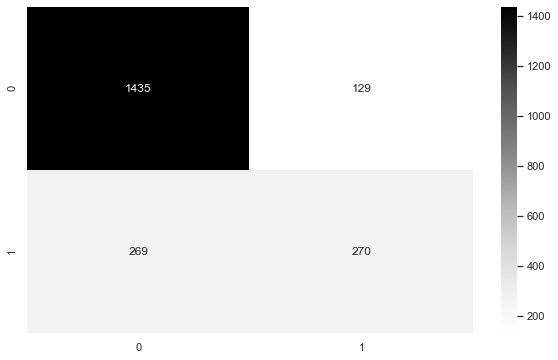

In [61]:
y_pred_1 = svc_model_1.predict(X_test)
cm = confusion_matrix(y_test, y_pred_1)
sns.set(rc={'figure.figsize':(10,6)})
colors = ["#bdbdbd", "#636363"]
sns.set_palette(sns.color_palette(colors))
sns.heatmap(cm, annot=True, fmt='g', cmap='Greys')


### Explanation of confusion matrix:
We had 2103 customers in our test set.<br>
Out of 1564 customers predicted to not churn, 269 were classified as not churn when actually they had leave (type one error).<br>
Out of 539 customers predicted to churn/leave, 129 were classified as churned whey they did not (type two error).

# TUNING OF HYPERPARAMETERS

### We'll use the GridSearchCV() method to tune the hyperparameters

We are using KFolds Cross Validation of 4 splits. <br>
(we were trying to use higher number of splits but it was taking too long, too many fits for our sample to work)

A statistical method of evaluation performance is <b>cross-validation</b>. Here, rather than splitting a data set into train and test, the dataset is split repeatedly and multiple models are trained. A widely used type if k-fold cross-validation as we use in this dataset. The data is split into equal folds and trained. For this dataset, 4 folds have been selected. The first fold of data representing approx. 25% is used for training, and then the remaining is used for testing. Following this, the next quarter is used for training and so on, meaning all data is used for both testing and training and this is a measure to reduce any impact of randomness. The output displays the accuracy of each fold. (Muller and Guido, 2016). We also employ hyperparameters of three selections for gamma and C to tune our model. The results indicate the level of sensitivity the model has to the selection of the training set. The disadvantage of using cross-validation is the high computational power needed to run.

In [62]:
folds = KFold(n_splits = 4, shuffle = True, random_state = 42)

We are specifying range of hyperparameters: gamma and C

In [63]:
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100]}]

We are specifying model that we work with, and the kernel:

In [64]:
svc = SVC(kernel="rbf")

We are now setting up the GridSearch() option:

In [65]:
svc_grid_search = GridSearchCV(estimator = svc, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      


After that we are fitting our GridSearch model:

In [66]:
svc_grid_search.fit(X_train, y_train)  

Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   15.1s finished


GridSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

Printing results in the form of DataFrame

In [67]:
cv_results = pd.DataFrame(svc_grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.207441,0.007662,0.053589,0.006865,1,0.01,"{'C': 1, 'gamma': 0.01}",0.805216,0.798696,0.771801,0.785481,0.790299,0.012830,3,0.786685,0.789402,0.802174,0.795436,0.793424,0.005962
1,0.212045,0.007512,0.054682,0.007815,1,0.001,"{'C': 1, 'gamma': 0.001}",0.746536,0.740016,0.717196,0.721860,0.731402,0.012208,7,0.726359,0.728533,0.736141,0.734583,0.731404,0.004070
2,0.199584,0.012617,0.058587,0.006767,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.746536,0.740016,0.717196,0.721860,0.731402,0.012208,7,0.726359,0.728533,0.736141,0.734583,0.731404,0.004070
3,0.208146,0.011325,0.048444,0.002728,10,0.01,"{'C': 10, 'gamma': 0.01}",0.807661,0.793806,0.776691,0.793638,0.792949,0.010977,1,0.794022,0.794837,0.805707,0.800054,0.798655,0.004683
4,0.205468,0.004092,0.046867,0.000001,10,0.001,"{'C': 10, 'gamma': 0.001}",0.806846,0.794621,0.768541,0.789560,0.789892,0.013836,4,0.786685,0.788859,0.801087,0.795708,0.793085,0.005695
5,0.214808,0.007784,0.048477,0.002791,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.746536,0.740016,0.717196,0.721860,0.731402,0.012208,7,0.726359,0.728533,0.736141,0.734583,0.731404,0.004070
6,0.298977,0.002971,0.050773,0.006768,100,0.01,"{'C': 100, 'gamma': 0.01}",0.797881,0.805216,0.770171,0.783850,0.789280,0.013440,6,0.801087,0.798370,0.813315,0.808476,0.805312,0.005918
7,0.203105,0.000002,0.054820,0.007956,100,0.001,"{'C': 100, 'gamma': 0.001}",0.806846,0.797881,0.773431,0.788744,0.791725,0.012350,2,0.788587,0.792935,0.802174,0.796251,0.794987,0.004960
8,0.195905,0.007251,0.050775,0.006767,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.806846,0.794621,0.767726,0.789560,0.789688,0.014152,5,0.785870,0.789402,0.801087,0.795708,0.793017,0.005842


Printing the best test score

In [68]:
best_score = svc_grid_search.best_score_
best_hyperparams = svc_grid_search.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format
      (best_score, best_hyperparams))

The best test score is 0.7929489889663113 corresponding to hyperparameters {'C': 10, 'gamma': 0.01}


Our results show the hyperparameter selection has more of an impact on the accuracy than the fold type. We see this as there is greater variance between of the accuracy of the parameter options than we see within the 4 folds of each parameter combination. There is a variance of approximately 3 % within fold and approximately 6% between selected hyperparameters. This implies that the model is not highly dependent on fold type.

# Building and Evaluating  <b>'Model number 2'</b> : <br>

"svc_model_2"    <b> Support Vector Machine </b> with best parameters. We will first specify the optimal hyperparameters and then build and fit the model respectively.

In [69]:
# specify optimal hyperparameters
best_params = {"C": 10, "gamma": 0.01, "kernel":"rbf"}

# model
svc_model_2 = SVC(C=10, gamma=0.01, kernel="rbf")

svc_model_2.fit(X_train, y_train.values.ravel())
y_pred_2 = svc_model_2.predict(X_test)

Print training and testing dataset scores

In [70]:
print('Training set score: {:.4f}'.format(svc_model_2.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(svc_model_2.score(X_test, y_test)))

Training set score: 0.7993
Test set score: 0.8160


Print accuracy, precision and sensitivity/recall scores

In [71]:
svc_model_2_accuracy = metrics.accuracy_score(y_test, y_pred_2)
svc_model_2_precision = metrics.precision_score(y_test, y_pred_2)
svc_model_2_recall = metrics.recall_score(y_test, y_pred_2)
svc_model_2_f1 = metrics.f1_score(y_test, y_pred_2)

print("Accuracy of SVM with best parameters - "   , svc_model_2_accuracy)
print("Precision of SVM with best parameters - ", svc_model_2_precision)
print("Sensitivity/recall of SVM with best parameters - ", svc_model_2_recall)
print('F1 score of SVM with best parameters - ', svc_model_2_f1)

Accuracy of SVM with best parameters -  0.8159771754636234
Precision of SVM with best parameters -  0.6881188118811881
Sensitivity/recall of SVM with best parameters -  0.5157699443413729
F1 score of SVM with best parameters -  0.5896076352067868


Classification Report

In [72]:
print(classification_report(y_test, y_pred_2))
print(metrics.confusion_matrix(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1564
           1       0.69      0.52      0.59       539

    accuracy                           0.82      2103
   macro avg       0.77      0.72      0.74      2103
weighted avg       0.81      0.82      0.81      2103

[[1438  126]
 [ 261  278]]


Confusion Matrix

<AxesSubplot:>

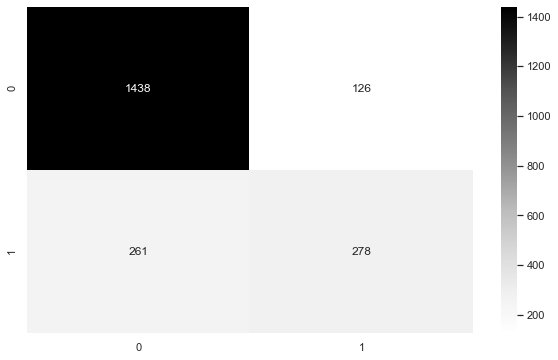

In [73]:
y_pred_2 = svc_model_2.predict(X_test)
cm = confusion_matrix(y_test, y_pred_2)
sns.set(rc={'figure.figsize':(10,6)})
colors = ["#bdbdbd", "#636363"]
sns.set_palette(sns.color_palette(colors))
sns.heatmap(cm, annot=True, fmt='g', cmap='Greys')


Explanation of confusion matrix:
Out of 1564 customers predicted to not churn, 261 were classified as not churn when actually they had leave (type one error).
Out of 539 customers predicted to churn/leave, 126 were classified as churned whey they did not (type two error).

### SVM model comparison<br>
(svc_model_1    VS    svc_model_2)

In [74]:
Model_Comparison = pd.DataFrame({
'Model' : ['SVC_1', 'SVC_2'],
'Accuracy Score' : [svc_model_1_accuracy, svc_model_2_accuracy],
'Precision' : [svc_model_1_precision, svc_model_2_precision],
'Recall': [svc_model_1_recall, svc_model_2_recall],
'F1 Score': [svc_model_1_f1, svc_model_2_f1]})
Model_Comparison_df = Model_Comparison.sort_values(by='Accuracy Score', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('Model')
Model_Comparison_df.reset_index()

,Model,Accuracy Score,Precision,Recall,F1 Score
0,SVC_2,0.815977,0.688119,0.515770,0.589608
1,SVC_1,0.810747,0.676692,0.500928,0.575693


After applying the optimal parameters the performance have improved, however, it is a small positive change and the result is still close to the default parameters.

# 2. ML MODEL - DECISION TREE

### Model Building - Decision Tree


A decision tree is a supervised learning technique that is non-parametric and can be used for both regression and classification. In our case, we use if for classification. The model employs simple decision rules, such as yes or no inferred from the data features. Decision trees have many benefits including ease of interpretation compared with other machine learning techniques and ability to handle both numerical and categorical data. In this case a decision tree is supervised classification technique. We use the scikit-learn library for the decision tree which uses an optimised version of the CART algorithm (CART = classification and regression trees).
Decision trees consist of nodes and asks a series of if/else questions until the exhaustion of each avenue. At each node there is a test which splits the data and as such builds a hierarchical partition (Muller and Guido, 2016). A decision is made at a non-terminal node based on one feature, with the optimal split selected.
One of the main challenges with decision trees is the need to control for complexity and potential to overfit. To control for overfitting, one strategy that has been implemented here is to set a limit on max depth and this is termed pre-pruning. A second is to set a limit to the max number of leaves. The accuracy achieved during the tuning phase indicates if the original model was overfitted.
Two methods of splitting the nodes are used in this case. Gini index is the default setting using scikit-learn. The GINI Index and the result is between 0 and 0.5. Entropy is a measure of the randomness in the system and the result is between 0 and 1. Results closer to zero represent a pure split. Gini Index uses less computational power.

### Building and Evaluating  <b>'Model number 3'</b> : <br>

"dt_model_1" <b>Decision Tree</b> with default parameters and max_depth=5 (for visualizatin purposes more deep tree is difficult to plot)

In [75]:
from sklearn.tree import DecisionTreeClassifier

dt_model_1 = DecisionTreeClassifier(max_depth=5)
dt_model_1.fit(X_train, y_train)
y_pred_3 = dt_model_1.predict(X_test)

Print training and testing dataset scores

In [76]:
print('Training set score: {:.4f}'.format(dt_model_1.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(dt_model_1.score(X_test, y_test)))

Training set score: 0.7976
Test set score: 0.8031


Print accuracy, precision and sensitivity/recall scores

In [77]:
dt_model_1_accuracy = metrics.accuracy_score(y_test, y_pred_3)
dt_model_1_precision = metrics.precision_score(y_test, y_pred_3)
dt_model_1_recall = metrics.recall_score(y_test, y_pred_3)
dt_model_1_f1 = metrics.f1_score(y_test, y_pred_3)

print("Accuracy of Decision Tree with default parameters - "   , dt_model_1_accuracy)
print("Precision of Decision Tree with default parameters - ", dt_model_1_precision)
print("Sensitivity/recall of Decision Tree with default parameters - ", dt_model_1_recall)
print('F1 score of Decision Tree with default parameters -', dt_model_1_f1)

Accuracy of Decision Tree with default parameters -  0.8031383737517832
Precision of Decision Tree with default parameters -  0.625250501002004
Sensitivity/recall of Decision Tree with default parameters -  0.5788497217068646
F1 score of Decision Tree with default parameters - 0.6011560693641618


Classification Report

In [78]:
print(classification_report(y_test, y_pred_3))
print(metrics.confusion_matrix(y_test, y_pred_3))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1564
           1       0.63      0.58      0.60       539

    accuracy                           0.80      2103
   macro avg       0.74      0.73      0.74      2103
weighted avg       0.80      0.80      0.80      2103

[[1377  187]
 [ 227  312]]


Confusion Matrix for Model 

<AxesSubplot:>

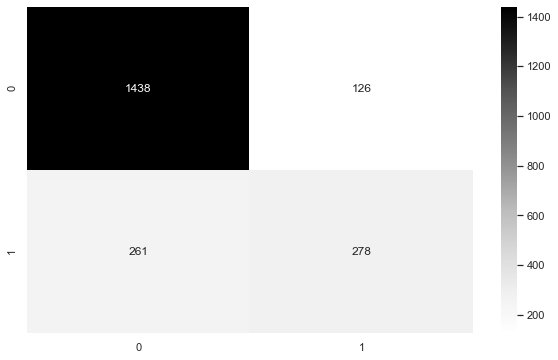

In [79]:
cm = confusion_matrix(y_test, y_pred_2)
sns.set(rc={'figure.figsize':(10,6)})
colors = ["#bdbdbd", "#636363"]
sns.set_palette(sns.color_palette(colors))
sns.heatmap(cm, annot=True, fmt='g', cmap='Greys')

Explanation of confusion matrix:
Out of 1564 customers predicted to not churn, 261 were classified as not churn when actually they had leave (type one error).
Out of 539 customers predicted to churn/leave, 126 were classified as churned whey they did not (type two error).

### Plotting the Decison Tree

Import required libraries

In [80]:
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(df_new.columns[1:])
features

['SeniorCitizen',
 'Partner',
 'Dependents',
 'Tenure',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'InternetService_Fiber optic',
 'InternetService_DSL',
 'InternetService_No',
 'Contract_One year ',
 'Contract_Two year',
 'Contract_Month-to-month',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [81]:
#!pip install graphviz

In [82]:
#!pip install graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

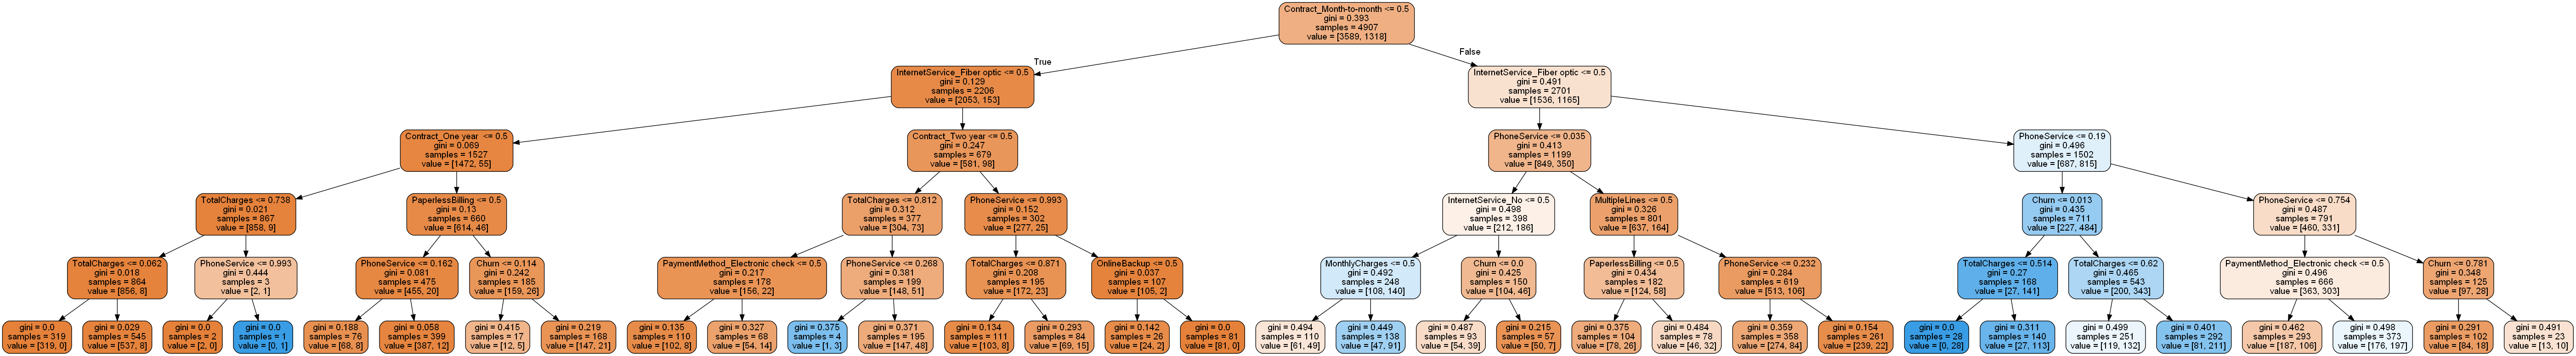

In [83]:
dot_data = StringIO()  
export_graphviz(dt_model_1, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

This is the decision tree using default parameters, now we apply gridsearch to tune.

# TUNING OF HYPERPARAMETERS

### Apply Grid Search to Find Optimal Hyperparameters

In [84]:
from sklearn.model_selection import GridSearchCV

# selecting parameters for GridSearch
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]}

# Adding Cross validation = 5
n_folds = 5

# Instantiate the grid search model
dt = DecisionTreeClassifier()
dt_grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
dt_grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.7s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

Print results in dataframe cv_results

In [85]:
cv_results = pd.DataFrame(dt_grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009367,0.000488,0.001596,0.000489,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.803462,0.797352,0.781855,0.776758,0.768603,0.785606,0.012948,3
1,0.008318,0.004987,0.000798,0.000746,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.803462,0.797352,0.781855,0.776758,0.768603,0.785606,0.012948,3
2,0.009372,0.007652,0.000000,0.000000,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.806517,0.797352,0.786952,0.766565,0.764526,0.784382,0.016592,7
3,0.006247,0.007651,0.003127,0.006253,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.806517,0.797352,0.786952,0.766565,0.764526,0.784382,0.016592,7
4,0.012266,0.003104,0.001395,0.000492,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.791242,0.781059,0.777778,0.787971,0.778797,0.783370,0.005304,13
5,0.010272,0.005716,0.000199,0.000397,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.791242,0.781059,0.777778,0.787971,0.778797,0.783370,0.005304,13
6,0.009374,0.007654,0.000000,0.000000,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.809572,0.792261,0.786952,0.766565,0.776758,0.786422,0.014547,1
7,0.006250,0.007655,0.003124,0.006248,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.809572,0.792261,0.786952,0.766565,0.776758,0.786422,0.014547,1
8,0.006250,0.007654,0.003125,0.006250,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.803462,0.797352,0.781855,0.773700,0.767584,0.784791,0.013668,5
9,0.009375,0.007655,0.000000,0.000000,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.803462,0.797352,0.781855,0.773700,0.767584,0.784791,0.013668,5


Print best accuracy score for the Decision Tree ML model

In [86]:
print("best accuracy", dt_grid_search.best_score_)
print(dt_grid_search.best_estimator_)

best accuracy 0.7864216446495638
DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=100,
                       min_samples_split=50)


Now, after having the best parameters calculated by GridSearch we can apply them to Decision Tree and see if ML model results will improve:

### Building and Evaluating  <b>'Model number 4'</b> : <br>

"dt_model_2" <b>Decision Tree</b> with best parameters

In [87]:
dt_model_2 = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 42,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)
dt_model_2.fit(X_train, y_train)
y_pred_4 = dt_model_2.predict(X_test)

Print training data and testing dataset scores

In [88]:
print('Training set score: {:.4f}'.format(dt_model_2.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(dt_model_2.score(X_test, y_test)))

Training set score: 0.8001
Test set score: 0.8055


Print accuracy, precision and sensitivity/recall scores

In [89]:
dt_model_2_accuracy = metrics.accuracy_score(y_test, y_pred_4)
dt_model_2_precision = metrics.precision_score(y_test, y_pred_4)
dt_model_2_recall = metrics.recall_score(y_test, y_pred_4)
dt_model_2_f1 = metrics.recall_score(y_test, y_pred_4)

print("Accuracy of Decision Tree with best parameters - "   , dt_model_2_accuracy)
print("Precision of Decision Tree with best parameters - ", dt_model_2_precision)
print("Sensitivity/recall of Decision Tree with best parameters - ", dt_model_2_recall)
print('F1 score for Decision Tree with best parameters - ', dt_model_2_f1)

Accuracy of Decision Tree with best parameters -  0.8055159296243461
Precision of Decision Tree with best parameters -  0.6555023923444976
Sensitivity/recall of Decision Tree with best parameters -  0.5083487940630798
F1 score for Decision Tree with best parameters -  0.5083487940630798


Classification Report

In [90]:
print(classification_report(y_test, y_pred_4))
print(metrics.confusion_matrix(y_test, y_pred_4))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1564
           1       0.66      0.51      0.57       539

    accuracy                           0.81      2103
   macro avg       0.75      0.71      0.72      2103
weighted avg       0.79      0.81      0.80      2103

[[1420  144]
 [ 265  274]]


Confusion Matrix

<AxesSubplot:>

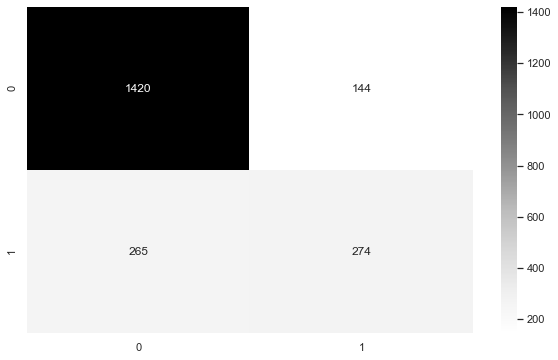

In [91]:
cm = confusion_matrix(y_test, y_pred_4)
sns.set(rc={'figure.figsize':(10,6)})
colors = ["#bdbdbd", "#636363"]
sns.set_palette(sns.color_palette(colors))
sns.heatmap(cm, annot=True, fmt='g', cmap='Greys')

Explanation of confusion matrix:
Out of 1564 customers predicted to not churn, 265 were classified as not churn when actually they had leave (type one error).
Out of 539 customers predicted to churn/leave, 144 were classified as churned whey they did not (type two error).

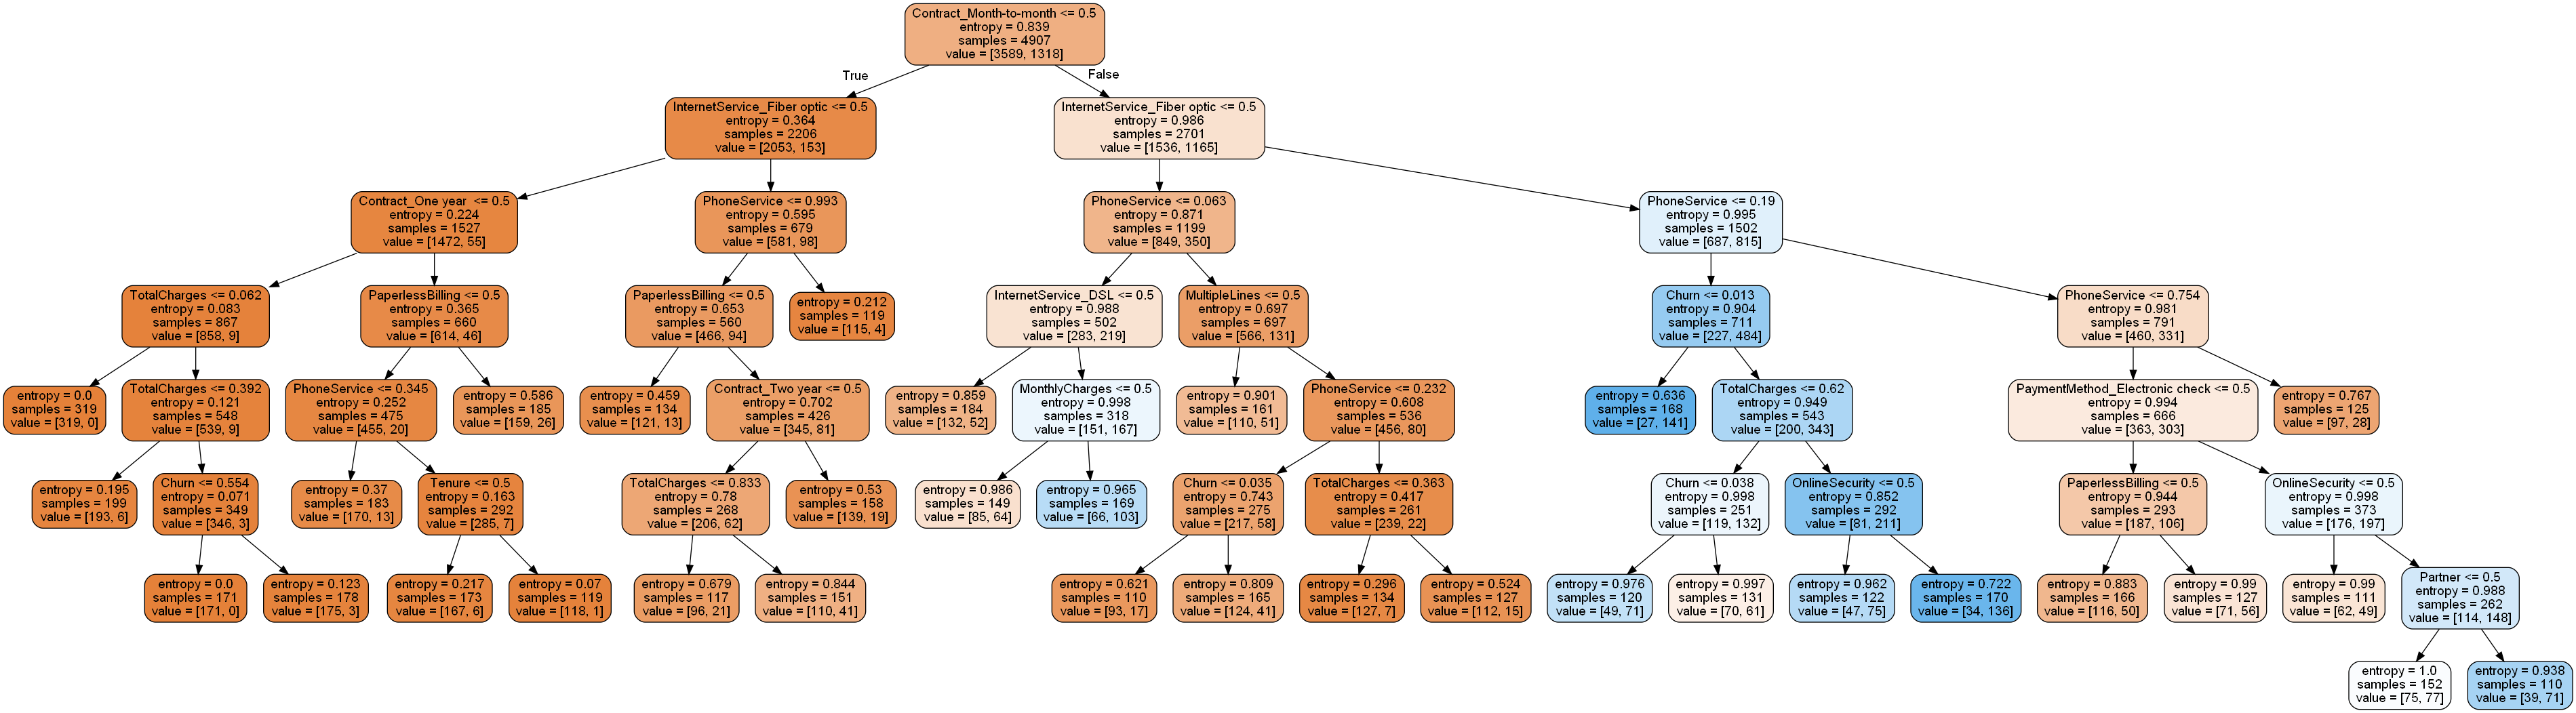

In [92]:
dot_data = StringIO()  
export_graphviz(dt_model_2, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

You can see that this tree is too complex to understand. Let's try reducing the max_depth and see how the tree looks.

In [93]:
dt_model_3 = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 42,
                                  max_depth=3, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)
dt_model_3.fit(X_train, y_train)

y_pred_5 = dt_model_3.predict(X_test) 

Print training and testing dataset scores

In [94]:
print('Training set score: {:.4f}'.format(dt_model_3.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(dt_model_3.score(X_test, y_test)))

Training set score: 0.7838
Test set score: 0.8050


Print accuracy, precision and sensitivity/recall scores

In [95]:
dt_model_3_accuracy = metrics.accuracy_score(y_test, y_pred_5)
dt_model_3_precision = metrics.precision_score(y_test, y_pred_5)
dt_model_3_recall = metrics.recall_score(y_test, y_pred_5)
dt_model_3_f1 = metrics.f1_score(y_test, y_pred_5)

print("Accuracy of Decision Tree with best parameters - "   , dt_model_3_accuracy)
print("Precision of Decision Tree with best parameters - ", dt_model_3_precision)
print("Sensitivity/recall of Decision Tree with best parameters - ", dt_model_3_recall)
print('F1 score of Decision Tree with best parameters - ', dt_model_3_f1)

Accuracy of Decision Tree with best parameters -  0.8050404184498335
Precision of Decision Tree with best parameters -  0.7345454545454545
Sensitivity/recall of Decision Tree with best parameters -  0.3747680890538033
F1 score of Decision Tree with best parameters -  0.49631449631449626


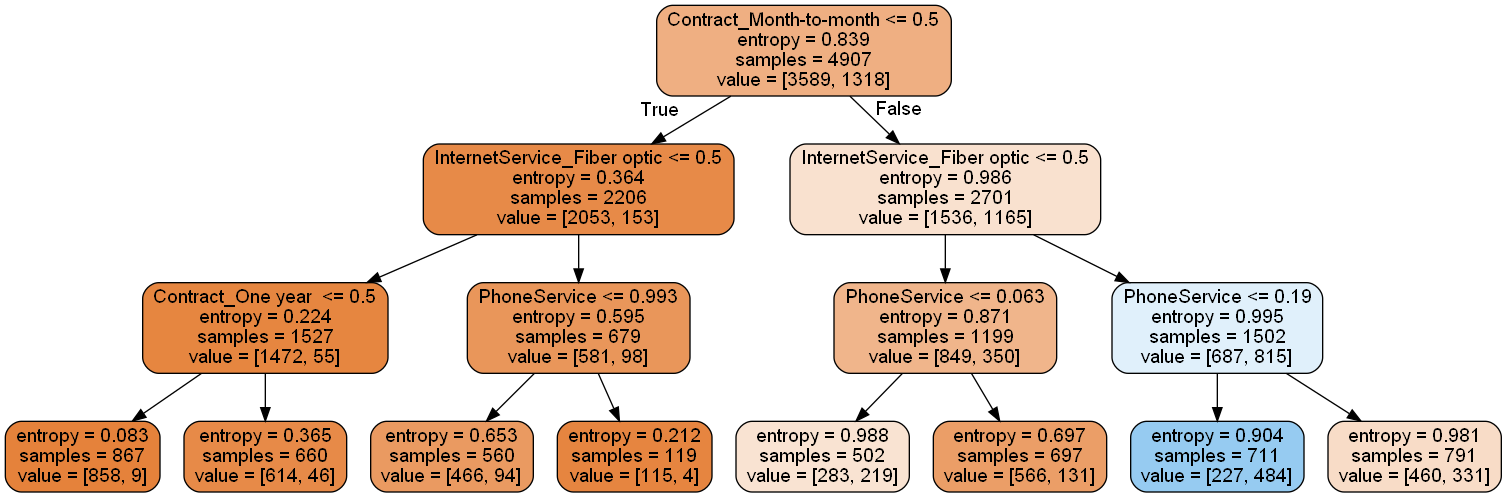

In [96]:
dot_data = StringIO()  
export_graphviz(dt_model_3, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Classification Report

In [97]:
print(classification_report(y_test, y_pred_4))
print(metrics.confusion_matrix(y_test, y_pred_4))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1564
           1       0.66      0.51      0.57       539

    accuracy                           0.81      2103
   macro avg       0.75      0.71      0.72      2103
weighted avg       0.79      0.81      0.80      2103

[[1420  144]
 [ 265  274]]


### Decision Tree model comparison<br>
(dt_model_1, dt_model_2, dt_model_3)

In [98]:
Model_Comparison_DT = pd.DataFrame({
'Model' : ['DTree_1', 'DTree_2', 'DTree_3'],
'Accuracy Score' : [dt_model_1_accuracy, dt_model_2_accuracy, dt_model_3_accuracy],
'Precision' : [dt_model_1_precision, dt_model_2_precision, dt_model_3_precision],
'Recall': [dt_model_1_recall, dt_model_2_recall, dt_model_3_recall],
'F1 score': [dt_model_1_f1, dt_model_2_f1, dt_model_3_f1]})
Model_Comparison_df_DT = Model_Comparison_DT.sort_values(by='Accuracy Score', ascending=False)
Model_Comparison_df_DT = Model_Comparison_df_DT.set_index('Model')
Model_Comparison_df_DT.reset_index()

,Model,Accuracy Score,Precision,Recall,F1 score
0,DTree_2,0.805516,0.655502,0.508349,0.508349
1,DTree_3,0.805040,0.734545,0.374768,0.496314
2,DTree_1,0.803138,0.625251,0.578850,0.601156


# 3. ML MODEL - LOGISTIC REGRESSION

Logistic regression is a linear type of supervised learning. Logistic regression is used to predict the continuous dependent variable using a given set of independent variables. Labelled training data is required to employ this technique. Linear models are fast to train and robust. 
We use the scikit-learn library. In addition to accuracy precision, recall and F1-score are also computed. Precision is the proportion of instances predicted as positive and correctly evaluated. Recall provides a count of the proportion of positive instances that were correctly evaluated. F1-score is the harmonic mean of precision and recall and presents this as a single value (Garetta and Moncecchi, 2013).
In logistic regression, a weighted sum of inputs is passed through a sigmoid function. A S-curve is obtained. A linear relationship between the variables is not required to use logistic regression.

### Building and Evaluating  <b>'Model number 6'</b> : <br>

"logreg_model"    <b> Logistic Regression </b> with default parameters

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42 )

In [100]:
from sklearn.linear_model import LogisticRegression 
logreg_model=LogisticRegression()
logreg_model.fit(X_train,y_train)
y_pred_logreg = logreg_model.predict(X_test)

Print training and testing dataset scores

In [101]:
print('Training set score: {:.4f}'.format(logreg_model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg_model.score(X_test, y_test)))

Training set score: 0.7989
Test set score: 0.8188


Print accuracy, precision and sensitivity/recall scores

In [102]:
logreg_model_accuracy = metrics.accuracy_score(y_test, y_pred_logreg)
logreg_model_precision = metrics.precision_score(y_test, y_pred_logreg)
logreg_model_recall = metrics.recall_score(y_test, y_pred_logreg)
logreg_model_f1 = metrics.f1_score(y_test, y_pred_logreg)

print("Accuracy of Logistic Regression  - "   , logreg_model_accuracy)
print("Precision of Logistic Regression - ", logreg_model_precision)
print("Sensitivity/recall of Logistic Regression - ", logreg_model_recall)
print('F1 score of Logistic Regression - ', logreg_model_f1)

Accuracy of Logistic Regression  -  0.818830242510699
Precision of Logistic Regression -  0.6787330316742082
Sensitivity/recall of Logistic Regression -  0.5565862708719852
F1 score of Logistic Regression -  0.6116207951070336


Classification Report

In [103]:
print(classification_report(y_test, y_pred_logreg))
print(metrics.confusion_matrix(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1564
           1       0.68      0.56      0.61       539

    accuracy                           0.82      2103
   macro avg       0.77      0.73      0.75      2103
weighted avg       0.81      0.82      0.81      2103

[[1422  142]
 [ 239  300]]


Confusion Matrix

<AxesSubplot:>

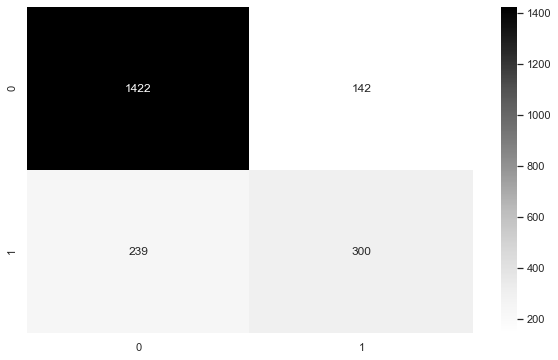

In [104]:
cm = confusion_matrix(y_test, y_pred_logreg)
sns.set(rc={'figure.figsize':(10,6)})
colors = ["#bdbdbd", "#636363"]
sns.set_palette(sns.color_palette(colors))
sns.heatmap(cm, annot=True, fmt='g', cmap='Greys')

Explanation of confusion matrix:
Out of 1564 customers predicted to not churn, 239 were classified as not churn when actually they had leave (type one error).
Out of 539 customers predicted to churn/leave, 142 were classified as churned whey they did not (type two error).

### Feature Selection Process

We have many features in this dataset and many features potentially may increase threshold value which in turn decreases the accuracy of the model. Whenever we give those data to train our model, the model gets confused because it is learning too much data.<br>
We will try to find out if that is the case for our dataset.<br>
To  answer this question we will try to find out the most important features using two methods: <br>
1. Pearson Correlation method
2. Univariate selection.

Feature selection identifies the features of most importance. In this case, identifies what are the main reasons for customer churn. This is invaluable business information. The techniques employed for this data set are Pearson Correlation which is a measure of linear correlation between two sets of data and univariate feature selection which is based on univariate statistical tests. The inclusion of features that are irrelevant to addressing the problem statement may decrease the accuracy of a model and feature selection helps counter this. 

We want to determine which features are most important for our data. The hyperparameter tuning didn’t affect the performance so we are checking to see if there are unimportant features

Applying the Pearson Correlation method and finding 10 features that have the strongest correlation with 'Churn':


In [105]:
# Absolute value of calculated correlation
imp_feat_corr = abs(df_new.corr()['Churn']).sort_values(ascending=False)[:11]
print(imp_feat_corr)

Churn                             1.000000
Contract_Month-to-month           0.404346
Tenure                            0.353339
InternetService_Fiber optic       0.307612
Contract_Two year                 0.301375
PaymentMethod_Electronic check    0.301079
InternetService_No                0.228220
TotalCharges                      0.198362
MonthlyCharges                    0.194008
PaperlessBilling                  0.190518
Contract_One year                 0.177742
Name: Churn, dtype: float64


Visualizing correlation of all features with target 'Churn'

Text(0.5, 1.0, 'Features correlation')

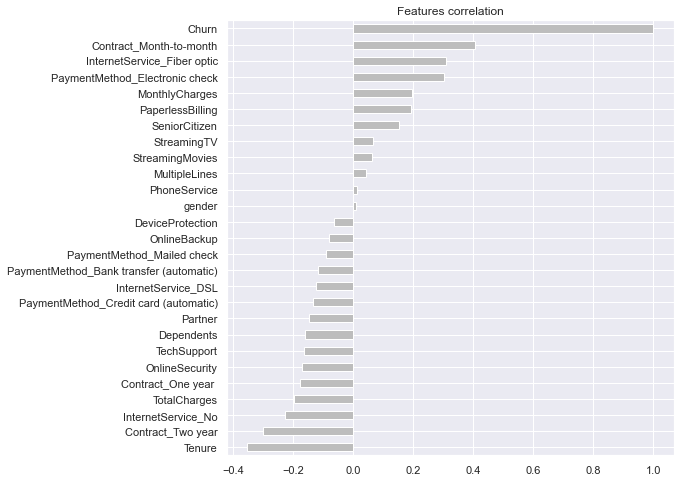

In [106]:
plt.figure(figsize=(8,8))
colors = ["#bdbdbd", "#636363"]
sns.set_palette(sns.color_palette(colors))
ax = df_new.corr()['Churn'][:].sort_values().plot(kind ='barh')
ax.set_title('Features correlation')

From the above bar chart we can see that the weakest correlation with 'Churn' have columns with values close to zero, like: gender, phoneService, DeviceProtection, MultipleLines, StreamingMovies. etc.

The feature Contract_Month_to_Month has the highest positive correlation, followed by InternetService_Fiber optic and PaymentMethod_Electronic check. This means that as these values increase, so too does churn rate. Tenure has the highest negative correlation, indication as a customer contract timeline increases, the churn rate decreases. Contract_Two year and InternetService_No are the features with the next highest negative correlation. Customers with a month to month contract is a moderate correlation, all other mentioned above show a weak correlation.

Also, we would like to plot HeatMap showing correlation coefficient of each pair of variables in our dataset.

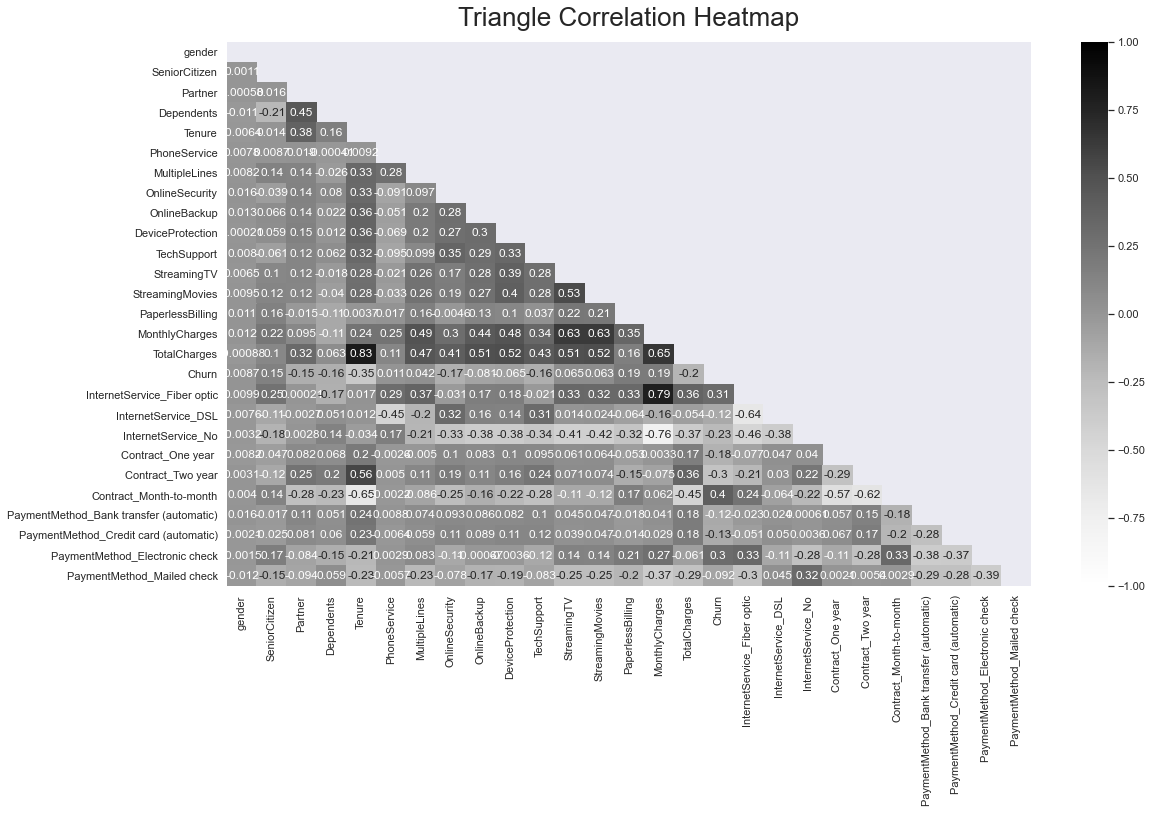

In [107]:
plt.figure(figsize = (18,10))        # Size of the figure
mask = np.triu(np.ones_like(df_new.corr(method = "pearson"), dtype=np.bool))
heatmap = sns.heatmap(df_new.corr(),vmin=-1, vmax=1, mask = mask, annot = True, cmap='Greys')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':26}, pad=16);

The second method we would like to use is: <b> Univariate selection </b> - statistical test that is  used to select those features that have the strongest relationship with the target variable.

Import required libraries

In [108]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


We will be using the SelectKBest method on our dataset with the parameters: score_func=chi2 and k=10 to fit our model. Based on the results, we will print a list with 10 features representing the variables with the best scores and fit.

In [109]:
#using SelectKBest method on our dataset with parameters: score_func=chi2 and k=10
bestfeatures = SelectKBest(score_func=chi2, k=10)
# fitting those 'bestfeatures' to our dataset X,y
fit = bestfeatures.fit(X,y)
# After fitting we can get the best scores for our dataframe:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature_name','Score']
featureScores
print(featureScores.nlargest(10,'Score'))

                      Feature_name       Score
21         Contract_Month-to-month  516.156863
20               Contract_Two year  483.653828
24  PaymentMethod_Electronic check  421.605909
16     InternetService_Fiber optic  370.930404
18              InternetService_No  286.672684
4                           Tenure  235.096120
19              Contract_One year   174.957731
7                   OnlineSecurity  145.316362
1                    SeniorCitizen  134.297582
10                     TechSupport  133.640977


Now we would like to try and apply our best performing model LinearRegression with default parameters on the new created Dataframe that contains only the most important features selected based on the Univariate selection method.

For that we have to create new Dataframe:

In [110]:
X_feat = df_new[['Contract_Month-to-month', 'Contract_Two year', 'PaymentMethod_Electronic check',
                 'InternetService_Fiber optic', 'InternetService_No', 'Tenure', 'Contract_One year ',
                 'OnlineSecurity', 'SeniorCitizen', 'TechSupport']]

Lets now apply our best model: Linear Regression on this X_feat set. <br>
We will first split the new dataframe into testing and training set as with our original dataset. For comparison, we are keeping the test size of 30%.

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size = 0.3, random_state=42 )

To double-check the size and shape of our split dataframe:

In [112]:
print('Number of rows and columns after splitting dataset: ', X_train.shape, X_test.shape, y_train.shape, y_test.shape )

Number of rows and columns after splitting dataset:  (4907, 10) (2103, 10) (4907, 1) (2103, 1)


For comparison, our original dataset was split into X including 7010 rows and 26 variables, and y with 7010 rows and only 1 column “churn”. The Number of rows and columns after splitting the original dataset were: (4907, 26) (2103, 26) (4907, 1) (2103, 1). For our new split the number of vaiables has been reduced from 26 to only 1o features.

Implementing the model on the new training and testing set

In [113]:
logreg_model_2=LogisticRegression()
logreg_model_2.fit(X_train,y_train)
y_pred_logreg_2 = logreg_model_2.predict(X_test)

Print training and testing dataset scores

In [114]:
print('Training set score: {:.4f}'.format(logreg_model_2.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg_model_2.score(X_test, y_test)))

Training set score: 0.7883
Test set score: 0.8112


Print accuracy, precision and sensitivity/recall scores

In [115]:
logreg_model_2_accuracy = metrics.accuracy_score(y_test, y_pred_logreg_2)
logreg_model_2_precision = metrics.precision_score(y_test, y_pred_logreg_2)
logreg_model_2_recall = metrics.recall_score(y_test, y_pred_logreg_2)
logreg_model_2_f1 = metrics.f1_score(y_test, y_pred_logreg_2)

print("Accuracy of Logistic Regression with new features"   , logreg_model_2_accuracy)
print("Precision of Logistic Regression with new features", logreg_model_2_precision)
print("Sensitivity/recall of Logistic Regression with new features", logreg_model_2_recall)
print('F1 score of Logistic Regression with new features', logreg_model_f1)

Accuracy of Logistic Regression with new features 0.8112220637184974
Precision of Logistic Regression with new features 0.6766169154228856
Sensitivity/recall of Logistic Regression with new features 0.5046382189239332
F1 score of Logistic Regression with new features 0.6116207951070336


Classification Report

In [116]:
print(classification_report(y_test, y_pred_logreg_2))
print(metrics.confusion_matrix(y_test, y_pred_logreg_2))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1564
           1       0.68      0.50      0.58       539

    accuracy                           0.81      2103
   macro avg       0.76      0.71      0.73      2103
weighted avg       0.80      0.81      0.80      2103

[[1434  130]
 [ 267  272]]


# PART 3: ML MODEL COMPARISON

Create a new dataframe "Model_Comparison_DT" that includes the results for the accuracy, precision and recall score from all seven models.

In [117]:
Model_Comparison_DT = pd.DataFrame({
'Model' : ['DTree_1', 'DTree_2', 'DTree_3', 'SVC_1', 'SVC_2', 'LogReg', 'LogReg_2'],
'Accuracy Score' : [dt_model_1_accuracy, dt_model_2_accuracy, dt_model_3_accuracy,
           svc_model_1_accuracy, svc_model_2_accuracy, logreg_model_accuracy, logreg_model_2_accuracy],
'Precision' : [dt_model_1_precision, dt_model_2_precision, dt_model_3_precision,
             svc_model_1_precision, svc_model_2_precision, logreg_model_precision, 
               logreg_model_2_precision],
'Recall': [dt_model_1_recall, dt_model_2_recall, dt_model_3_recall,
          svc_model_1_recall, svc_model_2_recall, logreg_model_recall, logreg_model_2_recall]})
Model_Comparison_df_DT = Model_Comparison_DT.sort_values(by='Accuracy Score', ascending=False)
Model_Comparison_df_DT = Model_Comparison_df_DT.set_index('Model')
Model_Comparison_df_DT.reset_index()

,Model,Accuracy Score,Precision,Recall
0,LogReg,0.818830,0.678733,0.556586
1,SVC_2,0.815977,0.688119,0.515770
2,LogReg_2,0.811222,0.676617,0.504638
3,SVC_1,0.810747,0.676692,0.500928
4,DTree_2,0.805516,0.655502,0.508349
5,DTree_3,0.805040,0.734545,0.374768
6,DTree_1,0.803138,0.625251,0.578850


By looking at the above results we can see that our original dataset performed better than the one newly created. The removal of features did not improve the performance of the model.

As we have concluded above the best model is the LinearRegression with default parameters.<br>
With Accuracy: 0.81, Precision: 0.67 and Recall: 0.55.
Finally, we want to answer our question and find out what are the most important features that have the highest impact in predicting customers who will most likely churn.

Applying an additional method to find the important features with more weight on our target variable.

### Using .coef_ method on LinearRegression model we are going to find the first 10 most important features, which are:

AxesSubplot(0.125,0.125;0.775x0.755)


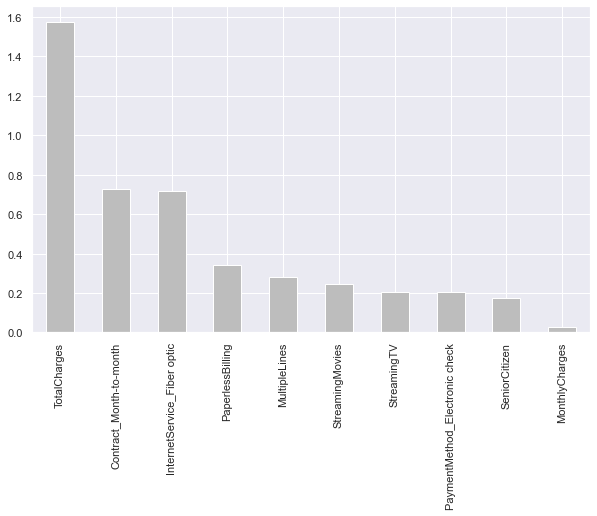

In [118]:
weights = pd.Series(logreg_model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

As per bar chart above, it shows that the variable “TotalCharges” is the most important feature, followed by the variable “Contract_month_to_month” and "InternetService_Fiber optic" with respect to our target variable "Churn". <br>
As we have seen, depending on which statictical method or Machine Learning model applied to our datset the outcomes and results may vary. 

# CONCLUDING REMARKS

We noticed that the feature selection method did not improve performance results of our ML model. Here, we would suggest to stay with our original dataset, and to not only implement the ML models on the dataset including only best features.

# APPENDIX Data Dictionary

<table style=´float:left;´>
    <thead>
      <tr>
      <th style="text-align:center;">Dataframe</th>
      <th style="text-align:center;">Description</th>
     </tr>
    </thead>
    <tbody>
      <tr>
      <td style="text-align:left;">df</td>
      <td style="text-align:left;">Original dataframe created</td>
     <tr>
     <td style="text-align:left;">df_dup; df_dup1 </td>
     <td style="text-align:left;">Dataframes created to check duplicate data</td>           
     <tr>
     <td style="text-align:left;">df_new</td>
     <td style="text-align:left;">Dataframe created to add columns by hot encoding</td>
      <tr>
      <td style="text-align:left;">X</td>
      <td style="text-align:left;">Independent features dataset</td>
      <tr>
      <td style="text-align:left;">y</td>
      <td style="text-align:left;">Label data only</td>
      <tr>
      <td style="text-align:left;">X_train,y_train</td>
      <td style="text-align:left;">Training dataset</td>
      <tr>
      <td style="text-align:left;">X_test,y_test</td>
      <td style="text-align:left;">Testing dataset</td>
      <tr>
      <td style="text-align:left;">svc_model_1</td>
      <td style="text-align:left;">Support Vector Machine with default parameters</td>
      <tr>
      <td style="text-align:left;">svc_model_2</td>
      <td style="text-align:left;">Support Vector Machine with best parameters</td>
      <tr>
      <td style="text-align:left;">dt_model_1</td>
      <td style="text-align:left;">Decision Tree with default parameters</td>
      <tr>
      <td style="text-align:left;">dt_model_2</td>
      <td style="text-align:left;">Decision Tree with best parameters</td>
      <tr>
      <td style="text-align:left;">dt_model_3</td>
      <td style="text-align:left;">Decision Tree with max_depth = 3</td>
      <tr>
      <td style="text-align:left;">logreg_model</td>
      <td style="text-align:left;">Logistic Regression with default parameters</td>
      <tr>
      <td style="text-align:left;">logreg_model_2</td>
      <td style="text-align:left;">Linear Regression on this X_feat dataframe</td>
      <tr>
      <td style="text-align:left;">imp_feat_corr</td>
      <td style="text-align:left;">10 features with strongest correlation with 'Churn'</td>
      <tr>
      <td style="text-align:left;">X_feat</td>
      <td style="text-align:left;">Dataframe created including best features</td>
       </tr>
        <td style="text-align:left;">Model_Comparison_DT</td>
      <td style="text-align:left;">Dataframe includes the results for the accuracy, precision and recall score from all models</td>
        </tr>
      </tbody>
</table>    
         
         

## REFERENCES
Ahmad, A.K., Jafar, A. & Aljoumaa, K. Customer churn prediction in telecom using machine learning in big data platform. J Big Data 6, 28 (2019) https://doi.org/10.1186/s40537-019-0191-6 https://journalofbigdata.springeropen.com/articles/10.1186/s40537-019-0191-6. <br>

Amaresan, S. (2021) What Is Customer Churn? [Definition]. Blog.hubspot.com. Available at: <https://blog.hubspot.com/service/what-is-customer-churn> (Accessed 2 December 2021). <br> 

Breiman, L. & Spector, P. (1992) Submodel selection and evaluation in regression—The X-random case. International Statistical Review vol. 60 no.03 pp. 291-319. <br> 

Bhasin, H. (2020) Machine Learning for Beginners. 1 st edn. BPB Publications. Available at: https://www.perlego.com/book/2089884/machine-learning-for-beginners-pdf (Accessed: 01 October 2021). <br> 

Brownlee, J., 2021. Ordinal and One-Hot Encodings for Categorical Data. [online] Machine Learning Mastery. Available at: <https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/> (Accessed 2 December 2021). <br>

CRISP-DM 1.0- Step-by-step data mining guide. Available online at: https://the-modeling-agency.com/crisp-dm.pdf (Accessed: 01 Nov 2021). <br>

Garreta, R. and Moncecchi, G. (2013) Learning scikit-learn: Machine Learning in Python. 1st edn. Packt Publishing. Available at: https://www.perlego.com/book/390355/learning-scikitlearn-machine-learning-in-python-pdf (Accessed: 29 October 2021). <br>

Müller, AC. and Guido, S. (2016) Introduction to Machine Learning with Python: A guide for data scientists. 
Scikit-learn (2021). Sklearn preprocessing MinMaxScaler. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html (Accessed 20 Nov 2021). <br>

VanderPlas, J., (2016) Python Data Science Handbook: Essential Tools for Working with Data, github, viewed 15 Oct 2021. <https://jakevdp.github.io/PythonDataScienceHandbook/02.01-understanding-data-types.html>. <br>

Zheng, A. and Casari, A. (2018). Feature Engineering for Machine Learning: Principles and Techniques for Data Scientists. O’Reilly Media, Sebastopol, CA. <br>